# Task 1

Your task is to write a function that calculates players' retention rate (by days starting from the registration date). There are two datasets containing registration and authentication dates of players.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def calculate_retention(data, reg_col, auth_col, id_col, days):
    '''
    Calculates retention by days.

        Parameters:
            data: dataframe
            reg_col: name of registration date column
            auth_col: name of authentication date column
            id_col: name of player id column
            days: array of days to calculate retention for

        Returns a dataframe with retention rates by days.
    '''
    # removing null values from the dataset, calculate difference in registration and authentication dates
    data = data.dropna()
    data['days_since_reg'] = (data[auth_col]-data[reg_col]).dt.days

    # creating a column with registration month and removing timestamps from registration and authentication dates
    data['month'] = data[reg_col].dt.to_period('M')
    data[reg_col] = data[reg_col].dt.to_period('D')
    data[auth_col] = data[auth_col].dt.to_period('D')

    # grouping players by registration month and day difference, creating a pivot table
    data = data.groupby(['month', 'days_since_reg'], as_index=False)[id_col].apply(pd.Series.nunique)
    data = data.pivot(index='month', columns='days_since_reg', values=id_col)

    # adding 0 to the days array so that retention rates were calculated correctly
    if 0 not in days:
        days.insert(0, 0)
    data = data[days]

    # counting size of player groups and dividing all columns by that number
    month_total = data.iloc[:, 0]
    retention_table = data.divide(month_total, axis=0).round(3)
    return retention_table

In [3]:
def retention_heatmap(table):
    '''Makes heatmap plot from a retention table.'''
    plt.figure(figsize=(20, 100))
    plt.title('Retention by days')
    ax = sns.heatmap(data=table, annot=True, fmt='.0%', cbar=False, cmap='Reds')
    ax.xaxis.tick_top()
    plt.show()

In [4]:
# loading authentication date dataset
auth_data = pd.read_csv('~/shared/problem1-auth_data.csv', sep=';')
auth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


In [5]:
# loading registration date dataset
reg_data = pd.read_csv('~/shared/problem1-reg_data.csv', sep=';')
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [6]:
# merging datasets, converting timestamp columns
df = pd.merge(reg_data, auth_data, how='left', on=['uid'])
df['reg_ts'] = pd.to_datetime(df['reg_ts'], unit='s')
df['auth_ts'] = pd.to_datetime(df['auth_ts'],  unit='s')
df.head()

,reg_ts,uid,auth_ts
0,1998-11-18 09:43:43,1,1998-11-18 09:43:43
1,1999-07-22 22:38:09,2,1999-07-22 22:38:09
2,1999-07-22 22:38:09,2,1999-07-25 16:46:46
3,1999-07-22 22:38:09,2,1999-07-31 03:50:15
4,1999-07-22 22:38:09,2,1999-08-05 17:49:39


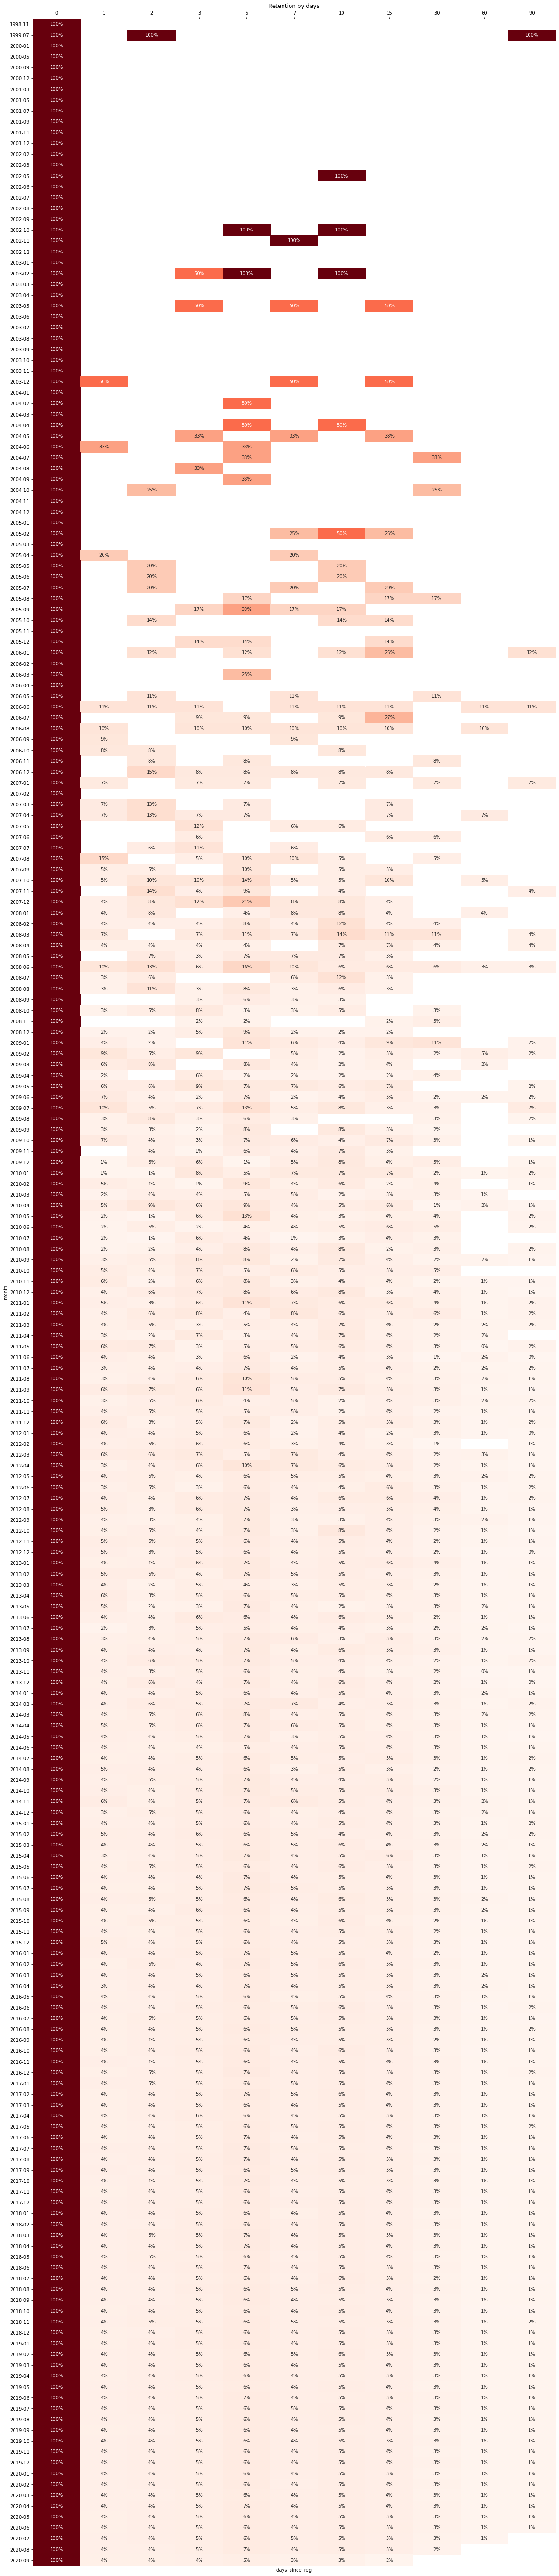

In [7]:
# using calculate_retention function and making a heatmap
res = calculate_retention(df, 'reg_ts', 'auth_ts', 'uid', [1, 2, 3, 5, 7, 10, 15, 30, 60, 90])
retention_heatmap(res)